<h1 style = "color: #ff4b3e;">Final Project Report</h1>
<h2>Using experience, played hours, number of sessions and age to predict if a player subscribes to a game-related newsletter.</h2>
<h4>Sargun Singh, Nathan Wu, Nicolas Zimmerman, Eric Song</h4>

<h2 style = "color: #704e2e;">Introduction</h2>
<p style= "max-width: 58rem;">Gaming has evolved much further than a Sunday evening past time since the 21st century. As of now, online gaming platforms provide rich opportunities to study player behavior and optimize user engagement strategies. The Pacific Laboratory for Artificial Intelligence (PLAI) at the University of British Columbia operates plaicraft.ai, a research initiative that collects detailed gameplay data from a Minecraft server. This data offers valuable insights that can help improve player retention and resource allocation.
</p>
<p style= "max-width: 58rem;">Understanding what motivates players to engage more deeply with a platform is a key figure to identify how to build strong gaming communities, for instance newsletters. Newsletter subscriptions represent an important form of player engagement, helping researchers maintain contact with participants and share updates about the project. By analyzing player characteristics and behavior patterns, we can determine which features best predict newsletter subscriptions.
</p>
<p style= "max-width: 58rem;"> Thus, our questions is: <strong>Can experience, played hours, number of sessions and age predict if a player subscribes to a game newsletter in players.csv?</strong> To answer this, we will use a knn classifier algorithm.</p>

We are using <code>players.csv</code> and <code>sessions.csv</code> dataset collected by the Pacific Laboratory for Artificial Intelligence (PLAI) to relate whether the predictor variables selected will affect ones subscription status. The columns are as follows:
<h4><code>players.csv:</code></h4>
<ul>
  <li><strong>experience</strong>: Shows the player’s skill level (e.g., "Beginner," "Amateur," "Regular," "Pro," "Veteran", factor encoded in order (1-5)).</li>
  <li><strong>subscribe</strong>: Indicates if the player subscribed to a newsletter (TRUE = yes, FALSE = no).</li>
  <li><strong>hashedEmail</strong>: A unique ID for each player (hashed email), links to sessions.csv.</li>
  <li><strong>played_hours</strong>: Total hours the player has played on the server.</li>
  <li><strong>name</strong>: Player's name.</li>
  <li><strong>gender</strong>: Player's gender.</li>
  <li><strong>age</strong>: Player's age in years.</li>
  <li><strong>num_sessions</strong>: Number of sessions the specific player has played.</li>
</ul>
<h4><code>sessions.csv:</code></h4>
<ul>
  <li><strong>hashedEmail</strong>: Links to player ID from players.csv.</li>
  <li><strong>start_time</strong>: Session start date and time (e.g., "30/06/2024 18:12").</li>
  <li><strong>end_time</strong>: Session end date and time (e.g., "30/06/2024 18:24").</li>
  <li><strong>original_start_time</strong>: Exact start time as a timestamp (e.g., 1719770000000 = ~June 30, 2024, 17:13 UTC).</li>
  <li><strong>original_end_time</strong>: Exact end time as a timestamp (should match end_time).</li>
</ul>


Based on the list above, we will be using `experience`, `played_hours`, `num_sessions` and `Age` as predictors, to classify players on whether or not they are subscribed using the `subscribe` response variable.

<h2 style = "color: #704e2e;"> Methods & Results</h2>

<h3>1. Preprocessing and Exploratory Data Analysis</h3>
<p style = "max-width: 68rem;">Our analysis begins with thorough preparation and exploration of the provided datasets. We worked with two primary data sources: the players.csv file containing individual player characteristics and the sessions.csv file recording gameplay sessions.</p>
<ul style = "margin-left: 25px; max-width: 60rem">
    <li>Firstly, we imported necessary libraries and loaded the <code>players.csv</code> and <code>sessions.csv</code> datasets.</li>
    <li>Then we cleaned and tidied data to make it usable and understandable. We also added a <code>num_sessions</code> variable to <code>players</code> dataset.</li>
    <li>Then we split the data into appropriate training and testing sets, and only used the training data set until the very end.</li>
    <li>We then performed summary statistics on only the training set to make predictions of our classifier.</li>
    <li>Then we visualized the relationship between <code>experience</code>, <code>played_hours</code>, <code>num_sessions</code> and <code>Age</code> variables, and distinguished between subscribed and non-subsribed players.</li>
</ul>
<h3>2. Finding the best <em>k</em> value</h3>
<p style = "max-width: 68rem;">Our goal is to determine the optimal <em  style ="font-weight: 700;"> k </em> value for the nearest neighbors that yields the highest prediction accuracy. In the code below, we create a classifier and use cross-validation to split the training data—training the model on one subset and evaluating it on another, as we cannot use the testing data. Our next steps are:</p>
<ul style = "margin-left: 25px; max-width: 60rem">
    <li>Use <code>recipe</code> function to center and scale the data.</li>
    <li>Use 10-fold cross-validation with <code>vfold_cv</code> on the training data. We choose ten folds because a single split can lead to results that are heavily influenced by which observations are in the validation set, so increasing the number of folds helps improve accuracy.</li>
    <li>Create a <em style ="font-weight: 700;">k</em>-nearest model with neighbours = tune() instead of a value to find the best value of <em  style ="font-weight: 700;">k</em> for <em  style ="font-weight: 700;">k</em>-nearest neighbours.</li>
    <li>Add the recipe and model to a workflow, using <code>tune_grid</code> to fit. This worfklow runs cross validation on a range of <em style = "font-weight: 700;">k</em>-nearest neighbours values that is specified in <code>gridvals</code>.</li>
    <li>Find the best <em style ="font-weight: 700;">k</em> value by filtering for accuracy and plotting a line plot with the accuracy estimate on the y-axis and <em style ="font-weight: 700;">k</em> (neighbours) on the x-axis.</li>
    <li>Ensure that the model does not underfit or overfit, and is more accurate than a majority classifier, using our new <em style ="font-weight: 700;">k</em>.</li>
</ul>
<h3>3. Testing our classifier</h3>
<ul style = "margin-left: 25px; max-width: 60rem">
    <li>Made a new model specification for the best <em style ="font-weight: 700;">k</em> value chosen, combined with the recipe made earlier in a workflow, and fit the classifier to our training set.</li>
    <li>Used <code>predict</code> on the testing set to evaluate the classifier's predicition accuracy on data it hadn't seen before.</li>
    <li>Produced a confusion matrix to get a sense of which classification the classifier was more accurate at giving.</li>
    <li>Tested the accuracy of our classifier when given data.</li>
</ul>
<h3>4. Visualizing our results</h3>
<ul style = "margin-left: 25px; max-width: 60rem">
    <li>We plotted <code>played_hours</code> (x-axis) vs. <code>num_sessions</code> (y-axis), colored by <code>subsribe</code> (blue = TRUE, red = FALSE), with shapes for <code>experience</code> (e.g., circles = Pros). A second plot shows <code>Age</code> vs. <code>played_hours</code> This shows how play time and frequency link to subscribing.</li>
</ul>

<h3>1. Preprocessing and Exploratory Data Analysis</h3>


<h4>Importing libraries and formatting graphs</h4>

<p>This notebook requires the following R libraries:</p>

<ul>
  <li><code>tidyverse</code>: For reading CSVs, data manipulation, and exploration.</li>
  <li><code>tidymodels</code>: For modeling, data manipulation, and preprocessing in machine learning workflows.</li>
  <li><code>gridExtra</code>: For displaying charts in a single row.</li>
  <li><code>lubridate</code>: For date-time parsing and manipulation.</li>
  <li><code>themis</code>: For downsampling data.</li>
</ul>

<p>Run the next cell to load the libraries.</p>


In [162]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(lubridate)
library(themis)
# formatting graphs
options(repr.plot.width = 20, repr.plot.height = 6)

<h4>Importing the dataset</h4>

<p>We used read_csv to import the datasets <code>players.csv</code> and <code>sessions.csv</code>.</p>



In [163]:
players_url <- "https://raw.githubusercontent.com/Sargun15/DSCIProject/refs/heads/main/players.csv"
session_url <- "https://raw.githubusercontent.com/Sargun15/DSCIProject/refs/heads/main/sessions.csv"

players <- read_csv(players_url, show_col_types = FALSE)
sessions <- read_csv(session_url, show_col_types = FALSE)

cat("Figure 1")
head(players)
dim(players)

cat("Figure 2")
head(sessions)
dim(sessions)

Figure 1

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196   7

Figure 2

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


[1] 1535    5

<h4>Cleaning and tidying the data</h4>

<p style = "max-width: 58rem;">We can see that in <code>players.csv</code> the variable <code>Age</code> is the only uppercase variable name which is slightly odd, so we will change it to <code>age</code> using <code>mutate</code> and also convert the datatype from <code>dbl</code> to <code>int</code> since age is usually expressed as a integer. We can also see that <code>experience</code> and <code>gender</code> clearly contain categories, so we will convert these variables into factors and factor encode it. We chose ordinal encoding for experience because its levels represent increasing skill, which carries meaningful order (e.g., Veteran > Pro > Regular > Amateur > Beginner). Now, we will summarize number of sessions for each player from the <code>sessions</code> dataset, verify that no missing values remain in our predictors after merging, and join it to our <code>players</code> dataset. Lastly, we will convert <code>subscribe</code> into a factor so we can use it on our model. </p>

<ul style = "margun-left: 25px; font-weight: 600;">
        <li>Beginner = 1</li>
        <li>Amateur = 2</li>
        <li>Regular = 3</li>
        <li>Pro = 4</li>
        <li>Veteran = 5</li>
</ul>


In [164]:
players <- players |> 
           rename(age = Age) |>
           mutate(
               age = as.integer(age),
               experience = as.integer(factor(experience, levels=c("Beginner", "Amateur", "Regular", "Pro", "Veteran"))),
               gender = factor(gender),
               subscribe = as.factor(subscribe)
           )
summarized_sessions <- sessions|> 
                       group_by(hashedEmail) |> 
                       summarize(num_sessions = n())

players <- players |> 
           left_join(summarized_sessions, by = "hashedEmail") |>
           mutate(num_sessions = if_else(is.na(num_sessions), 0, num_sessions)) |>
           drop_na()

cat("Figure 3")
head(players)

Figure 3

experience,subscribe,hashedEmail,played_hours,name,gender,age,num_sessions
<int>,<fct>,<chr>,<dbl>,<chr>,<fct>,<int>,<dbl>
4,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
5,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
5,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
2,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
3,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
2,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,0


<p style = "max-width: 58rem;">Similarly we can see that <code>start_time</code> and <code>end_time</code> variables are dates but the data type are characters, so we will use <code>mutate</code> to convert these variables from <code>char</code> to <code>dttm</code> objects. We will also mutate <code>original_end_time</code> to match <code>end_time</code> since it currently is the same as <code>original_start_time</code>.</p>

In [165]:
sessions <- sessions|> mutate(
    start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time),
    original_end_time = as.numeric(end_time) * 1000  
  )

cat("Figure 4")
head(sessions)

Figure 4

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.719772e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.718668e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.721930e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.721880e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.716654e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.719163e+12


<p>At this point, both the <code>players.csv</code> and <code>sessions.csv</code> datasets are clean and tidy.</p>

<h4>Splitting our data into training and testing sets</h4>
<p style = "max-width: 58rem;">Before creating our classifier, we will split our data into training and testing sets. We will use <code>initial_split</code> to split our data into 75% training and 25% testing, this shuffles our data for us and ensures a constant proportion of each class. A 75-25 split allows us to train our data on as many data point as we need while also keeping enough data for effective testing later.</p>

<p>It is important to note since all 4 of the predictor variables and the response variable are from the <code>players</code> dataset, we will not use the <code>sessions</code> dataset. </p>

In [190]:
set.seed(1)
players_split <- initial_split(players, prop = 0.75, strata = subscribe)

players_training <- training(players_split)
players_testing <- testing(players_split)

cat("Figure 5")
head(players_training)

dim(players_training)
dim(players_testing)

Figure 5

experience,subscribe,hashedEmail,played_hours,name,gender,age,num_sessions
<int>,<fct>,<chr>,<dbl>,<chr>,<fct>,<int>,<dbl>
5,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
2,FALSE,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22,0
2,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17,1
5,FALSE,951e54f7376e2b2f0915e9e3646c701af4a2fe839385b13f9e0084b08f8070bd,0.1,Vivienne,Male,18,1
2,FALSE,df6a1201c9c638aff1df8aeaf459a5b0a00aa04824936ee0305f5c275352c647,0.0,Vasco,Prefer not to say,33,0
5,FALSE,88247d9a46fc214a12485dcbcbb03a8ddebfe8c1ec5fe209cd660147625c8e62,1.4,Aiden,Prefer not to say,25,6


[1] 145   8

[1] 49  8

<p style = "max-width: 58rem;">In the code above we used the <code>initial_split</code> function to split the <code>players.csv</code> dataset 75-25 to build our model and to well test it. <code>initial_split</code> shuffles the data, removes bias and order and stratifies it by <code>subscribe</code> so an equal proportion is in each set.</p>
<p>There were a total of 196 rows in <code>players.csv</code> and we can see 147 rows (75%) in the training set and 49 rows (25%) in the testing set.</p>
<p>Now, until the very end we will only be using the training set.</p>

<h4>Summary Statistics</h4>

In [191]:
#players_training set summary statistics
hours_max <- players_training |> summarise(max = max(played_hours, na.rm = TRUE)) |> pull(max)
hours_min <- players_training |> summarise(min = min(played_hours, na.rm = TRUE)) |> pull(min)
hours_mean <- players_training |> summarise(mean = mean(played_hours, na.rm = TRUE)) |> pull(mean)
hours_sum <- players_training |> summarise(sum = sum(played_hours, na.rm = TRUE)) |> pull(sum)
hours_median <- players_training |> summarise(median = median(played_hours, na.rm = TRUE)) |> pull(median)
hours_deviation <- players_training |> summarise(sd = sd(played_hours, na.rm = TRUE)) |> pull(sd)
hours_na <- players_training |> summarise(missing = sum(is.na(played_hours))) |> pull(missing)

age_max <- players_training |> summarise(max = max(age, na.rm = TRUE)) |> pull(max)
age_min <- players_training |> summarise(min = min(age, na.rm = TRUE)) |> pull(min)
age_mean <- players_training |> summarise(mean = mean(age, na.rm = TRUE)) |> pull(mean)
age_sum <- players_training |> summarise(sum = sum(age, na.rm = TRUE)) |> pull(sum)
age_median <- players_training |> summarise(median = median(age, na.rm = TRUE)) |> pull(median)
age_deviation <- players_training |> summarise(sd = sd(age, na.rm = TRUE)) |> pull(sd)
age_na <- players_training |> summarise(missing = sum(is.na(age))) |> pull(missing)

ns_max <- players_training |> summarise(max = max(num_sessions, na.rm = TRUE)) |> pull(max)
ns_min <- players_training |> summarise(min = min(num_sessions, na.rm = TRUE)) |> pull(min)
ns_mean <- players_training |> summarise(mean = mean(num_sessions, na.rm = TRUE)) |> pull(mean)
ns_sum <- players_training |> summarise(sum = sum(num_sessions, na.rm = TRUE)) |> pull(sum)
ns_median <- players_training |> summarise(median = median(num_sessions, na.rm = TRUE)) |> pull(median)
ns_deviation <- players_training |> summarise(sd = sd(num_sessions, na.rm = TRUE)) |> pull(sd)
ns_na <- players_training |> summarise(missing = sum(is.na(num_sessions))) |> pull(missing)

cat("Figure 6", "\n")
cat("Played Hours:", "\n")
cat("Max Hours: ", hours_max, "\n")
cat("Min Hours: ", hours_min, "\n")
cat("Mean Hours: ", hours_mean, "\n")
cat("Sum Hours: ", hours_sum, "\n")
cat("Median Hours: ", hours_median, "\n")
cat("Standard Deviation Hours: ", hours_deviation, "\n")
cat("Missing Hours: ", hours_na, "\n")

cat("\n")
cat("Figure 7", "\n")
cat("Age:", "\n")
cat("Max Age: ", age_max, "\n")
cat("Min Age: ", age_min, "\n")
cat("Mean Age: ", age_mean, "\n")
cat("Sum Age: ", age_sum, "\n")
cat("Median Age: ", age_median, "\n")
cat("Standard Deviation Age: ", age_deviation, "\n")
cat("Missing Hours: ", age_na, "\n")

cat("\n")
cat("Figure 8", "\n")
cat("Num Sessions:", "\n")
cat("Max Num Sessions: ", ns_max, "\n")
cat("Min Num Sessions: ", ns_min, "\n")
cat("Mean Num Sessions: ", ns_mean, "\n")
cat("Sum Num Sessions: ", ns_sum, "\n")
cat("Median Num Sessions: ", ns_median, "\n")
cat("Standard Deviation Num Sessions: ", ns_deviation, "\n")
cat("Missing Hours: ", ns_na, "\n")

experience_count <- players_training |> group_by(experience) |> summarize(count = n(), percentage = n()/nrow(players_training) * 100)
gender_count <- players_training |> group_by(gender) |> summarize(count  = n(), percentage = n()/nrow(players_training) * 100 )
subscribe_count <- players_training |> group_by(subscribe) |> summarize(count  = n(), percentage = n()/ nrow(players_training) * 100)
unique_email_count <- players_training |> summarize(unique_emails = n_distinct(hashedEmail), duplicate_emails =  sum(duplicated(hashedEmail)))
unique_names_count <- players_training |> summarise(unique_names = n_distinct(name), duplicate_names =  sum(duplicated(name)))

cat("Figure 9")
experience_count

cat("Figure 10")
gender_count

cat("Figure 11")
subscribe_count

cat("Figure 12")
unique_email_count

cat("Figure 13")
unique_names_count

Figure 6 
Played Hours: 
Max Hours:  218.1 
Min Hours:  0 
Mean Hours:  4.884138 
Sum Hours:  708.2 
Median Hours:  0.1 
Standard Deviation Hours:  23.26505 
Missing Hours:  0 

Figure 7 
Age: 
Max Age:  50 
Min Age:  9 
Mean Age:  20.96552 
Sum Age:  3040 
Median Age:  19 
Standard Deviation Age:  6.829688 
Missing Hours:  0 

Figure 8 
Num Sessions: 
Max Num Sessions:  310 
Min Num Sessions:  0 
Mean Num Sessions:  7.565517 
Sum Num Sessions:  1097 
Median Num Sessions:  1 
Standard Deviation Num Sessions:  32.51086 
Missing Hours:  0 
Figure 9

experience,count,percentage
<int>,<int>,<dbl>
1,27,18.620690
2,42,28.965517
3,27,18.620690
4,9,6.206897
5,40,27.586207


Figure 10

gender,count,percentage
<fct>,<int>,<dbl>
Agender,1,0.6896552
Female,27,18.6206897
Male,90,62.0689655
Non-binary,14,9.6551724
Prefer not to say,9,6.2068966
Two-Spirited,4,2.7586207


Figure 11

subscribe,count,percentage
<fct>,<int>,<dbl>
FALSE,39,26.89655
TRUE,106,73.10345


Figure 12

unique_emails,duplicate_emails
<int>,<int>
145,0


Figure 13

unique_names,duplicate_names
<int>,<int>
145,0


#### Players training set summary statistics
  - Observations: 145
  - Variables: 7
  - Data was collected from player profiles or registrations 
  - Potential issues in dataset
    - There can be missing players that were not recorded
    - Data only has registered players; casual or unregistered ones might be missing
    - Ages 8 to 50 seem odd; could be typos or unusual.
##### Data Description
##### Figure 14
<table style="margin-left: 0; text-align: left;">
  <tr>
    <th>Variable Name</th>
    <th>Data Type</th>
    <th>Variable Purpose</th>
  </tr>
  <tr>
    <td>experience</td>
    <td>Double</td>
    <td>Shows the player’s skill level (e.g., "Beginner," "Amateur," "Regular," "Pro," "Veteran", factor encoded in order (1-5)).</td>
  </tr>
  <tr>
    <td>subscribe</td>
    <td>Logical</td>
    <td>Indicates if the player subscribed to a newsletter (TRUE = yes, FALSE = no).</td>
  </tr>
  <tr>
    <td>hashedEmail</td>
    <td>Character</td>
    <td>A unique ID for each player (hashed email), links to sessions.csv</td>
  </tr>
  <tr>
    <td>played_hours</td>
    <td>Double</td>
    <td>Total hours the player has played on the server.</td>
  </tr>
  <tr>
    <td>name</td>
    <td>Character</td>
    <td>Player's name</td>
  </tr>
  <tr>
    <td>gender</td>
    <td>Factor</td>
    <td>Player's gender</td>
  </tr>
  <tr>
    <td>age</td>
    <td>Integer</td>
    <td>Player's age in years</td>
  </tr>
  <tr>
    <td>num_sessions</td>
    <td>Double</td>
    <td>Number of sessions the specific player has played</td>
  </tr>
</table>


##### Numerical Variables Summary Statistics
##### Figure 15
<table style="margin-left: 0;">
  <tr>
    <th>Categories</th>
    <th>Max</th>
    <th>Min</th>
    <th>Mean</th>
    <th>Sum</th>
    <th>Median</th>
    <th>Standard Deviation</th>
    <th>Missing Values</th>
  </tr>
  <tr>
    <td>played_hours</td>
    <td>218.1</td>
    <td>0</td>
    <td>4.884138</td>
    <td>708.2</td>
    <td>0.1</td>
    <td>23.26505</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>50</td>
    <td>9</td>
    <td>20.96522</td>
    <td>3040</td>
    <td>19</td>
    <td>6.829688</td>
    <td>2</td>
  </tr>
  <tr>
    <td>Num Sessions</td>
    <td>310</td>
    <td>0</td>
    <td>7.565517</td>
    <td>1097</td>
    <td>1</td>
    <td>32.51086</td>
    <td>0</td>
  </tr>
</table>

##### Categorical Variable Summary Statistics
<div style="display: flex; gap: 0;">
    <div>
     <h5 style = "margin-left:10px;">Figure 16</h5>
     <h5 style = "margin-left:10px;">experience</h5>
      <table style="margin: 0;">
        <tr>
          <th>Category Name</th>
          <th>Count</th>
          <th>Percentage</th>
        </tr>
        <tr>
          <td>Beginner - 1</td>
          <td>27</td>
          <td>18.6%</td>
        </tr>
        <tr>
          <td>42 - 2</td>
          <td>42</td>
          <td>29%</td>
        </tr>
        <tr>
          <td>Regular - 3</td>
          <td>27</td>
          <td>18.6%</td>
        </tr>
        <tr>
          <td>Pro - 4</td>
          <td>9</td>
          <td>6.2%</td>
        </tr>
        <tr>
          <td>Veteran - 5</td>
          <td>40</td>
          <td>27.6%</td>
        </tr>
      </table>
    </div>
  <div>
     <h5 style = "margin-left:10px;">Figure 17</h5>
     <h5 style = "margin-left:20px;">subscribe</h5>
      <table style="margin: 0; margin-left: 10px;">
        <tr>
          <th>Category Name</th>
          <th>Count</th>
          <th>Percentage</th>
        </tr>
        <tr>
          <td>FALSE</td>
          <td>39</td>
          <td>26.9%</td>
        </tr>
        <tr>
          <td>TRUE</td>
          <td>106</td>
          <td>73.1%</td>
        </tr>
      </table>
    </div>
    <div>
     <h5 style = "margin-left:10px;">Figure 18</h5>
     <h5 style = "margin-left:20px;">gender</h5>
      <table style="margin: 0; margin-left: 10px;">
        <tr>
          <th>Category Name</th>
          <th>Count</th>
          <th>Count</th>
        </tr>
        <tr>
          <td>Agender</td>
          <td>1</td>
          <td>0.69%</td>
        </tr>
        <tr>
          <td>Female</td>
          <td>27</td>
          <td>18.6%</td>
        </tr>
        <tr>
          <td>Male</td>
          <td>90</td>
          <td>62.1%</td>
        </tr>
        <tr>
          <td>Non-binary</td>
          <td>14</td>
          <td>9.7%</td>
        </tr>
        <tr>
          <td>Prefer not to say</td>
          <td>9</td>
          <td>6.2%</td>            
        </tr>
        <tr>
          <td>Two-spirited</td>
          <td>4</td>
          <td>2.8%</td>            
        </tr>
      </table>
    </div>
    <div>
     <h5 style = "margin-left:10px;">Figure 19</h5>        
     <h5 style = "margin-left:20px;">hashedEmail</h5>
      <table style="margin: 0; margin-left: 10px;">
        <tr>
          <th>Unique IDs</th>
          <th>Duplicates</th>
          <th>Missing</th>
        </tr>
        <tr>
          <td>145</td>
          <td>0</td>
          <td>0</td>            
        </tr>
      </table>
    </div>
   <div>
     <h5 style = "margin-left:10px;">Figure 20</h5>       
     <h5 style = "margin-left:20px;">name</h5>
      <table style="margin: 0; margin-left: 10px;">
        <tr>
          <th>Unique names</th>
          <th>Duplicates</th>
          <th>Missing</th>            
        </tr>
        <tr>
          <td>145</td>
          <td>0</td>
          <td>0</td>            
        </tr>
      </table>
    </div>    
</div>


In [192]:
#Sessions.csv summary statistics
original_start_max <- sessions |> summarise(max = max(original_start_time, na.rm = TRUE)) |> pull(max)
original_start_min <- sessions |> summarise(min = min(original_start_time, na.rm = TRUE)) |> pull(min)
original_start_mean <- sessions |> summarise(mean = mean(original_start_time, na.rm = TRUE)) |> pull(mean)
original_start_sum <- sessions |> summarise(sum = sum(original_start_time, na.rm = TRUE)) |> pull(sum)
original_start_median <- sessions |> summarise(median = median(original_start_time, na.rm = TRUE)) |> pull(median)
original_start_deviation <- sessions |> summarise(sd = sd(original_start_time, na.rm = TRUE)) |> pull(sd)
original_start_na <- sessions |> summarise(missing = sum(is.na(original_start_time))) |> pull(missing)

original_end_max <- sessions |> summarise(max = max(original_end_time, na.rm = TRUE)) |> pull(max)
original_end_min <- sessions |> summarise(min = min(original_end_time, na.rm = TRUE)) |> pull(min)
original_end_mean <- sessions |> summarise(mean = mean(original_end_time, na.rm = TRUE)) |> pull(mean)
original_end_sum <- sessions |> summarise(sum = sum(original_end_time, na.rm = TRUE)) |> pull(sum)
original_end_median <- sessions |> summarise(median = median(original_end_time, na.rm = TRUE)) |> pull(median)
original_end_deviation <- sessions |> summarise(sd = sd(original_end_time, na.rm = TRUE)) |> pull(sd)
original_end_na <- sessions |> summarise(missing = sum(is.na(original_end_time))) |> pull(missing)

cat("Original Start Time:", "\n")
cat("Max Start Time: ", original_start_max, "\n")
cat("Min Start Time: ", original_start_min, "\n")
cat("Mean Start Time: ", original_start_mean, "\n")
cat("Sum Start Time: ", original_start_sum, "\n")
cat("Median Start Time: ", original_start_median, "\n")
cat("Standard Deviation Start Time: ", original_start_deviation, "\n")
cat("Missing Start Time: ", original_start_na, "\n")

cat("\n")
cat("Original End Time:", "\n")
cat("Max End Time: ", original_end_max, "\n")
cat("Min End Time: ", original_end_min, "\n")
cat("Mean End Time: ", original_end_mean, "\n")
cat("Sum End Time: ", original_end_sum, "\n")
cat("Median End Time: ", original_end_median, "\n")
cat("Standard Deviation End Time: ", original_end_deviation, "\n")
cat("Missing End Time: ", original_end_na, "\n")
cat("\n")

email_counts <- sessions |>
  summarise(
    unique_players = n_distinct(hashedEmail, na.rm = TRUE), 
    total_sessions = n(), 
    duplicate_count = total_sessions - unique_players,
    missing_count = sum(is.na(hashedEmail) | hashedEmail == "")
  )

start_time_stats <- sessions |>
  summarise(
    unique_start_times = n_distinct(start_time, na.rm = TRUE), 
    missing_start_count = sum(is.na(start_time))
  )

end_time_stats <- sessions |>
  summarise(
    unique_end_times = n_distinct(end_time, na.rm = TRUE),
    missing_end_count = sum(is.na(end_time))
  )

email_counts
start_time_stats
end_time_stats

Original Start Time: 
Max Start Time:  1.72733e+12 
Min Start Time:  1.7124e+12 
Mean Start Time:  1.719201e+12 
Sum Start Time:  2.638974e+15 
Median Start Time:  1.7192e+12 
Standard Deviation Start Time:  3557491589 
Missing Start Time:  0 

Original End Time: 
Max End Time:  1.727336e+12 
Min End Time:  1.712396e+12 
Mean End Time:  1.719196e+12 
Sum End Time:  2.635527e+15 
Median End Time:  1.71918e+12 
Standard Deviation End Time:  3552892971 
Missing End Time:  2 



unique_players,total_sessions,duplicate_count,missing_count
<int>,<int>,<int>,<int>
125,1535,1410,0


unique_start_times,missing_start_count
<int>,<int>
1504,0


unique_end_times,missing_end_count
<int>,<int>
1489,2


#### Dataset - sessions.csv complete descriptive summary
- Observations: 1535
- Variables: 5
- Data was collected from server logs tracking player sessions.
- Possible hidden issues:
  - start_time and end_time as text may need format conversion; possible data gaps.
  - Possible missing sessions if the server failed.
  - Time zone mismatch (e.g., text times might be local, timestamps UTC).
##### Data Description
##### Figure 21
<table style="margin-left: 0;">
  <tr>
    <th>Variable Name</th>
    <th>Type</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>hashedEmail</td>
    <td>Character</td>
    <td>Links to player ID from players.csv.</td>
  </tr>
  <tr>
    <td>start_time</td>
    <td>Character</td>
    <td>Session start date and time (e.g., "30/06/2024 18:12").</td>
  </tr>
  <tr>
    <td>end_time</td>
    <td>Character</td>
    <td>Session end date and time (e.g., "30/06/2024 18:24").</td>
  </tr>
  <tr>
    <td>original_start_time</td>
    <td>Double</td>
    <td>Exact start time as a timestamp (e.g., 1719770000000 = ~June 30, 2024, 17:13 UTC).</td>
  </tr>
  <tr>
    <td>original_end_time</td>
    <td>Double</td>
    <td>Exact end time as a timestamp (should match end_time).</td>
  </tr>
</table>

##### Numerical Variables Summary Statistics
##### Figure 22
<table style="margin-left: 0;">
  <tr>
    <th>Categories</th>
    <th>Max</th>
    <th>Min</th>
    <th>Mean</th>
    <th>Sum</th>
    <th>Median</th>
    <th>Standard Deviation</th>
    <th>Missing Values</th>
  </tr>
  <tr>
    <td>original_start_time</td>
    <td>1727330000000</td>
    <td>1712400000000</td>
    <td>1719201000000</td>
    <td>2638974000000000</td>
    <td>1719200000000</td>
    <td>3557491589</td>
    <td>0</td>
  </tr>
  <tr>
    <td>original_end_time</td>
    <td>1727336000000</td>
    <td>1712396000000</td>
    <td>1719196000000</td>
    <td>2635527000000000</td>
    <td>1719180000000</td>
    <td>3552892971</td>
    <td>2</td>
  </tr>
</table>

##### Discrete Quantitative Variables Summary Statistics
<div style="display: flex; gap: 0;">
    <div>
     <h5 style = "margin-left:20px;">hashedEmail</h5>
     <h5 style = "margin-left:20px;">Fgiure 22</h5>
      <table style="margin: 0; margin-left: 10px;">
        <tr>
          <th>Unique Players</th>
          <th>Duplicate Entries</th>
          <th>Missing Entries</th
        </tr>
        <tr>
          <td>125</td>
          <td>1410</td>
          <td>0</td>            
        </tr>
      </table>
    </div>
     <div>
     <h5 style = "margin-left:20px;">start_time</h5>
     <h5 style = "margin-left:20px;">Figure 23</h5>         
      <table style="margin: 0; margin-left: 10px;">
        <tr>
          <th>Unique</th>
          <th>Missing</th>
        </tr>
        <tr>
          <td>1504</td>
          <td>0</td>
        </tr>
      </table>
    </div>
    <div>
     <h5 style = "margin-left:20px;">end_time</h5>
     <h5 style = "margin-left:20px;">Figure 24</h5>        
      <table style="margin: 0; margin-left: 10px;">
        <tr>
          <th>Unique</th>
          <th>Missing</th>
        </tr>
        <tr>
          <td>1489</td>
          <td>2</td>
        </tr>
      </table>
    </div>
</div>

<h4>Visualizing the relationship between predictor and response variables</h4>

<p>To effectively visualize the relationship between all predictor variables and the reponse variables we will use <code>ggplot</code> to create 8 plots:</p>
<ul>
    <h4 style = "margin-left:-30px;">Scatter Plots</h4>
    <li>Played Hours vs. Number of Sessions (colored by <code>subscribe</code>)</li>
    <li>Played Hours vs. Age (colored by <code>subscribe</code>)</li>
    <li>Number of Sessions vs. Age (colored by <code>subscribe</code>)</li>
</ul>
<ul>
    <h4 style = "margin-left:-30px;">Box Plots</h4>
    <li>Played Hours by Experience (colored by <code>subscribe</code>)</li>
    <li>Number of Sessions by Experience (colored by <code>subscribe</code>)</li>
    <li>Age by Experience (colored by <code>subscribe</code>)</li>
</ul>
<ul>
    <h4 style = "margin-left:-30px;">Density Plots</h4>
    <li>Played Hours Density by Subscription Status</li>
    <li>Number of Sessions Density by Subscription Status</li>
    <li>Age Density by Subscription Status</li>
</ul>

#### Scatter Plots

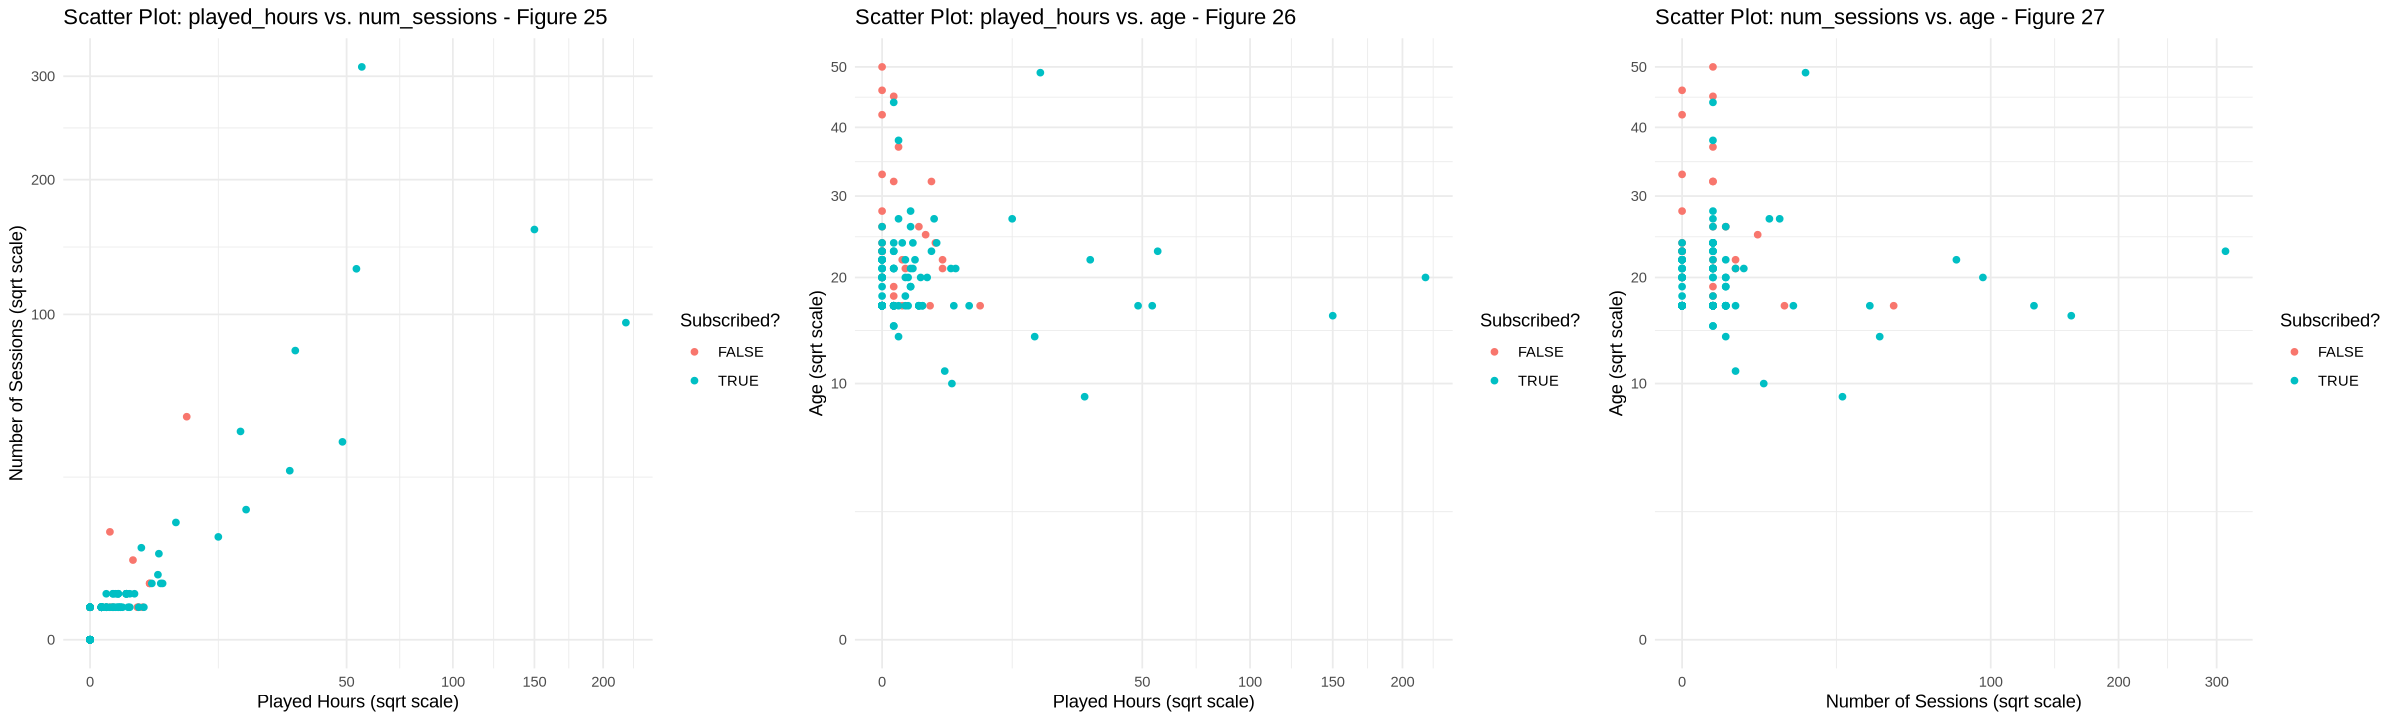

In [193]:
hours_v_sessions <- players_training |>
                    ggplot(aes(x = played_hours, y = num_sessions, color = subscribe)) +
                    geom_point() +
                    scale_x_sqrt(limits = c(0, NA)) +
                    scale_y_sqrt(limits = c(0, NA)) +
                    labs(title = "Scatter Plot: played_hours vs. num_sessions - Figure 25",
                         x = "Played Hours (sqrt scale)",
                         y = "Number of Sessions (sqrt scale)",
                         color = "Subscribed?") +
                    theme_minimal()

hours_v_age <- players_training |>
                    ggplot(aes(x = played_hours, y = age, color = subscribe)) +
                    geom_point() +
                    scale_x_sqrt(limits = c(0, NA)) +
                    scale_y_sqrt(limits = c(0, NA)) +
                    labs(title = "Scatter Plot: played_hours vs. age - Figure 26",
                         x = "Played Hours (sqrt scale)",
                         y = "Age (sqrt scale)",
                         color = "Subscribed?") +
                    theme_minimal()

sessions_v_age <- players_training |>
                    ggplot(aes(x = num_sessions, y = age, color = subscribe)) +
                    geom_point() +
                    scale_x_sqrt(limits = c(0, NA)) +
                    scale_y_sqrt(limits = c(0, NA)) +
                    labs(title = "Scatter Plot: num_sessions vs. age - Figure 27",
                         x = "Number of Sessions (sqrt scale)",
                         y = "Age (sqrt scale)",
                         color = "Subscribed?") +
                    theme_minimal()

# Arrange the plots with grid.arrange
grid.arrange(hours_v_sessions, hours_v_age, sessions_v_age, ncol = 3)

<p style = "max-width: 58rem;">These scatter plots reveal that subscribers consistently show higher engagement than non-subscribers across all metrics. The data suggests a strong positive correlation between played hours and number of sessions. While gaming intensity peaks among younger players (15-30), the age distribution shows some dedicated older subscribers who maintain substantial gaming habits, indicating that subscription status is a stronger predictor of engagement than age alone.</p>

#### Box Plots

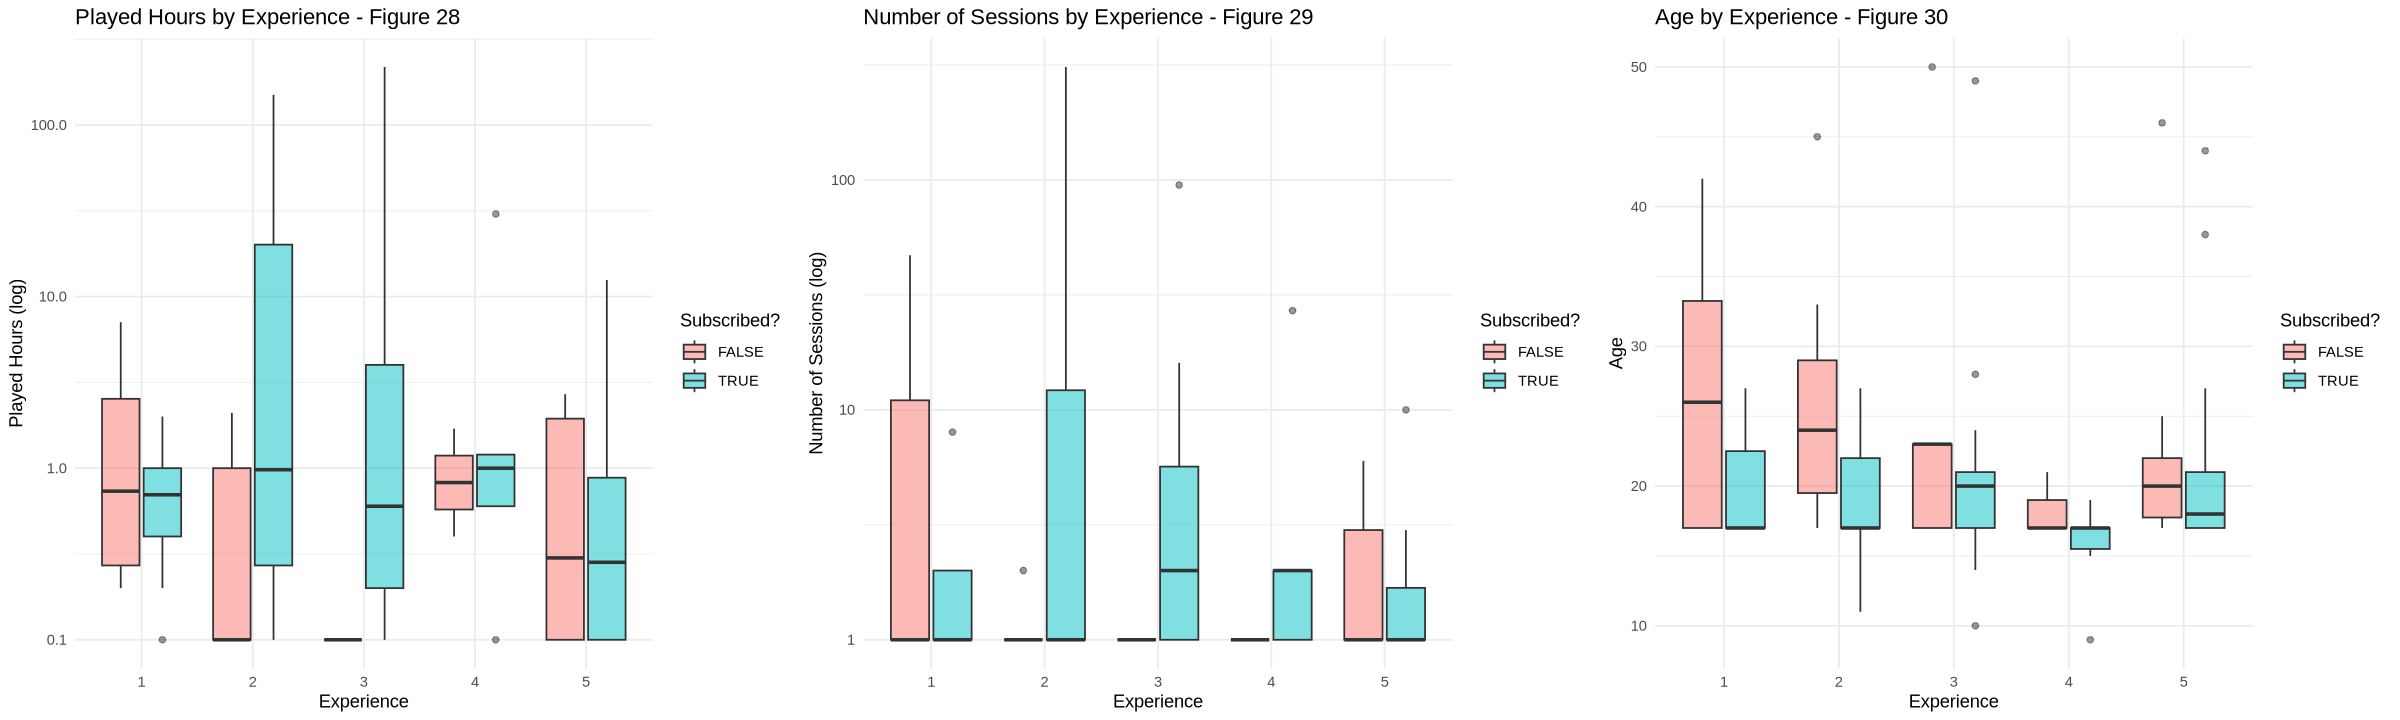

In [194]:
players_train_fct <- players_training
players_train_fct <- players_train_fct |> mutate(experience = as.factor(experience))

hours_by_exp <- players_train_fct |>
  ggplot(aes(x = experience, y = played_hours, fill = subscribe)) +
  geom_boxplot(alpha = 0.5) +
  scale_y_log10() +
  labs(title = "Played Hours by Experience - Figure 28 ", x = "Experience", y = "Played Hours (log)", fill = "Subscribed?", color = "Subscribed?") +
  theme_minimal()

sessions_by_exp <- players_train_fct |>
  ggplot(aes(x = experience, y = num_sessions, fill = subscribe)) +
  geom_boxplot(alpha = 0.5) +
  scale_y_log10() +
  labs(title = "Number of Sessions by Experience - Figure 29", x = "Experience", y = "Number of Sessions (log)", fill = "Subscribed?", color = "Subscribed?") +
  theme_minimal()

age_by_exp <- players_train_fct |>
  ggplot(aes(x = experience, y = age, fill = subscribe)) +
  geom_boxplot(alpha = 0.5) +
  labs(title = "Age by Experience - Figure 30", x = "Experience", y = "Age", fill = "Subscribed?", color = "Subscribed?") +
  theme_minimal()

suppressWarnings(grid.arrange(hours_by_exp, sessions_by_exp, age_by_exp, ncol = 3))

<p style = "max-width: 58rem;">These box plots show gaming metrics across experience levels 1-5, with different patterns between subscribers (teal) and non-subscribers (pink).
Figure 28 reveals that played hours peak for subscribers at experience level 2, while non-subscribers generally maintain higher median hours at levels 4-5. The logarithmic scale highlights significant variation in playtime within each group.
Figure 29 demonstrates that gaming sessions are highest for mid-level subscribers, particularly at level 3, with both groups showing declining session frequency at higher experience levels, suggesting veterans play less frequently but potentially for longer periods.
Figure 30 indicates that less experienced non-subscribers tend to be older than their subscribing counterparts, with the age gap narrowing at higher experience levels, revealing that experience and age correlate differently based on subscription status.</p>

#### Density Plots

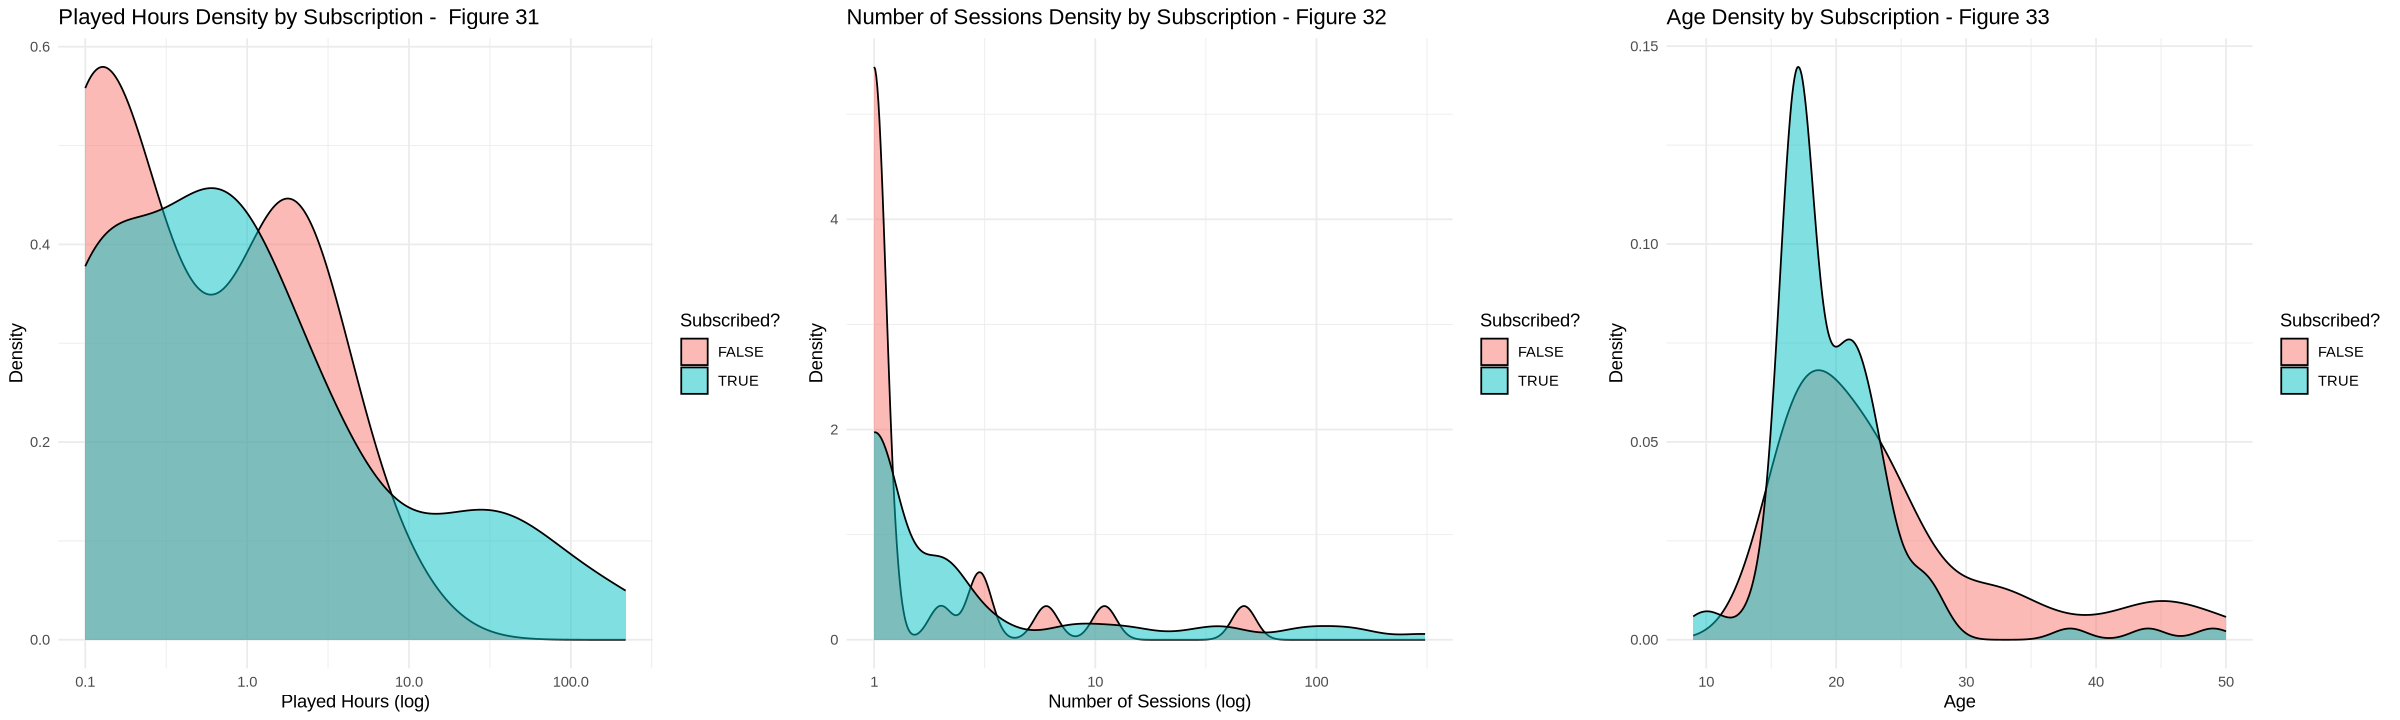

In [225]:
hours_density <- players_training |>
  ggplot(aes(x = played_hours, fill = subscribe)) +
  geom_density(alpha = 0.5) +
  scale_x_log10() +
  labs(title = "Played Hours Density by Subscription -  Figure 31", x = "Played Hours (log)", y = "Density", fill = "Subscribed?") +
  theme_minimal()

sessions_density <- players_training |>
  ggplot(aes(x = num_sessions, fill = subscribe)) +
  geom_density(alpha = 0.5) +
  scale_x_log10() +
  labs(title = "Number of Sessions Density by Subscription - Figure 32", x = "Number of Sessions (log)", y = "Density", fill = "Subscribed?") +
  theme_minimal()

age_density <- players_training |>
  ggplot(aes(x = age, fill = subscribe)) +
  geom_density(alpha = 0.5) +
  labs(title = "Age Density by Subscription - Figure 33", x = "Age", y = "Density", fill = "Subscribed?") +
  theme_minimal()

suppressWarnings(grid.arrange(hours_density, sessions_density, age_density, ncol = 3))

<p style = "max-width: 58rem;">These density plots reveal distinct patterns in gaming behavior between subscribers and non-subscribers. Figure 31 shows that while non-subscribers (pink) cluster around fewer played hours with a sharp peak at the lower end, subscribers (teal) display a broader distribution with greater representation at higher playtime values, indicating more intense engagement. Figure 32 demonstrates similar session count patterns, with non-subscribers heavily concentrated at minimal session counts while subscribers show a more distributed pattern suggesting regular engagement. Figure 33 reveals that subscribers tend to be younger overall with a pronounced peak in the mid-teens, while non-subscribers have a wider age distribution extending more noticeably into older age ranges, suggesting the subscription model particularly appeals to younger players who tend to engage more intensively with the game.</p>

<h3>2. Finding the best <em>k</em> value</h3>
<h4>Creating the model</h4>
<p>We will do the following steps to create our model:</p>
<ul>
    <li>create a recipe that uses <code>players_training</code> to predict <code>subscribe</code>, with <code>experience</code>, <code>played_hours</code>, <code>num_sessions</code> and <code>age</code> as predictors.</li>
    <li>create a specification that uses k-nearest neighbors, with <code>neighbors = tune()</code> to perform cross-validation.</li>
    <li>split the data into 10 equally sized chunks, known as folds, stratifying by <code>subscribe</code></li>
    <li>create a workflow combining the first 2 steps, with <code>tune_grid</code> instead of <code>fit</code>.</li>
    <li>repeat for each validation set for values of 1 ≤ <em style = "font-weight: 600;">k</em> ≤ 100</li>
</ul>
<p>To get the same folds each time, we need to set the seed to 1.</p>

In [254]:
set.seed(1)

players_recipe <- recipe(subscribe ~ experience + played_hours + num_sessions + age , data = players_training) |>
   step_mutate(experience = as.numeric(experience)) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

players_vfold <- vfold_cv(players_training, v = 10, strata = subscribe)

gridvals <- tibble(neighbors = c(1:100))

# Create workflow
knn_results <- workflow() |>
      add_recipe(players_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = players_vfold, grid = gridvals) %>%
# Collect metrics, filter for accuracy
      collect_metrics() |>
      filter(.metric == "accuracy") |>
      select(neighbors, mean) |>
      arrange(desc(mean))

cat("Figure 34")
head(knn_results)

Figure 34

neighbors,mean
<int>,<dbl>
9,0.7650183
11,0.7583516
12,0.7583516
13,0.7583516
14,0.7583516
10,0.7578755


<p>We can see that <em style= "font-weight: 600;">k</em>=9 is the best <em style= "font-weight: 600;">k</em> value. </p>

Figure 35

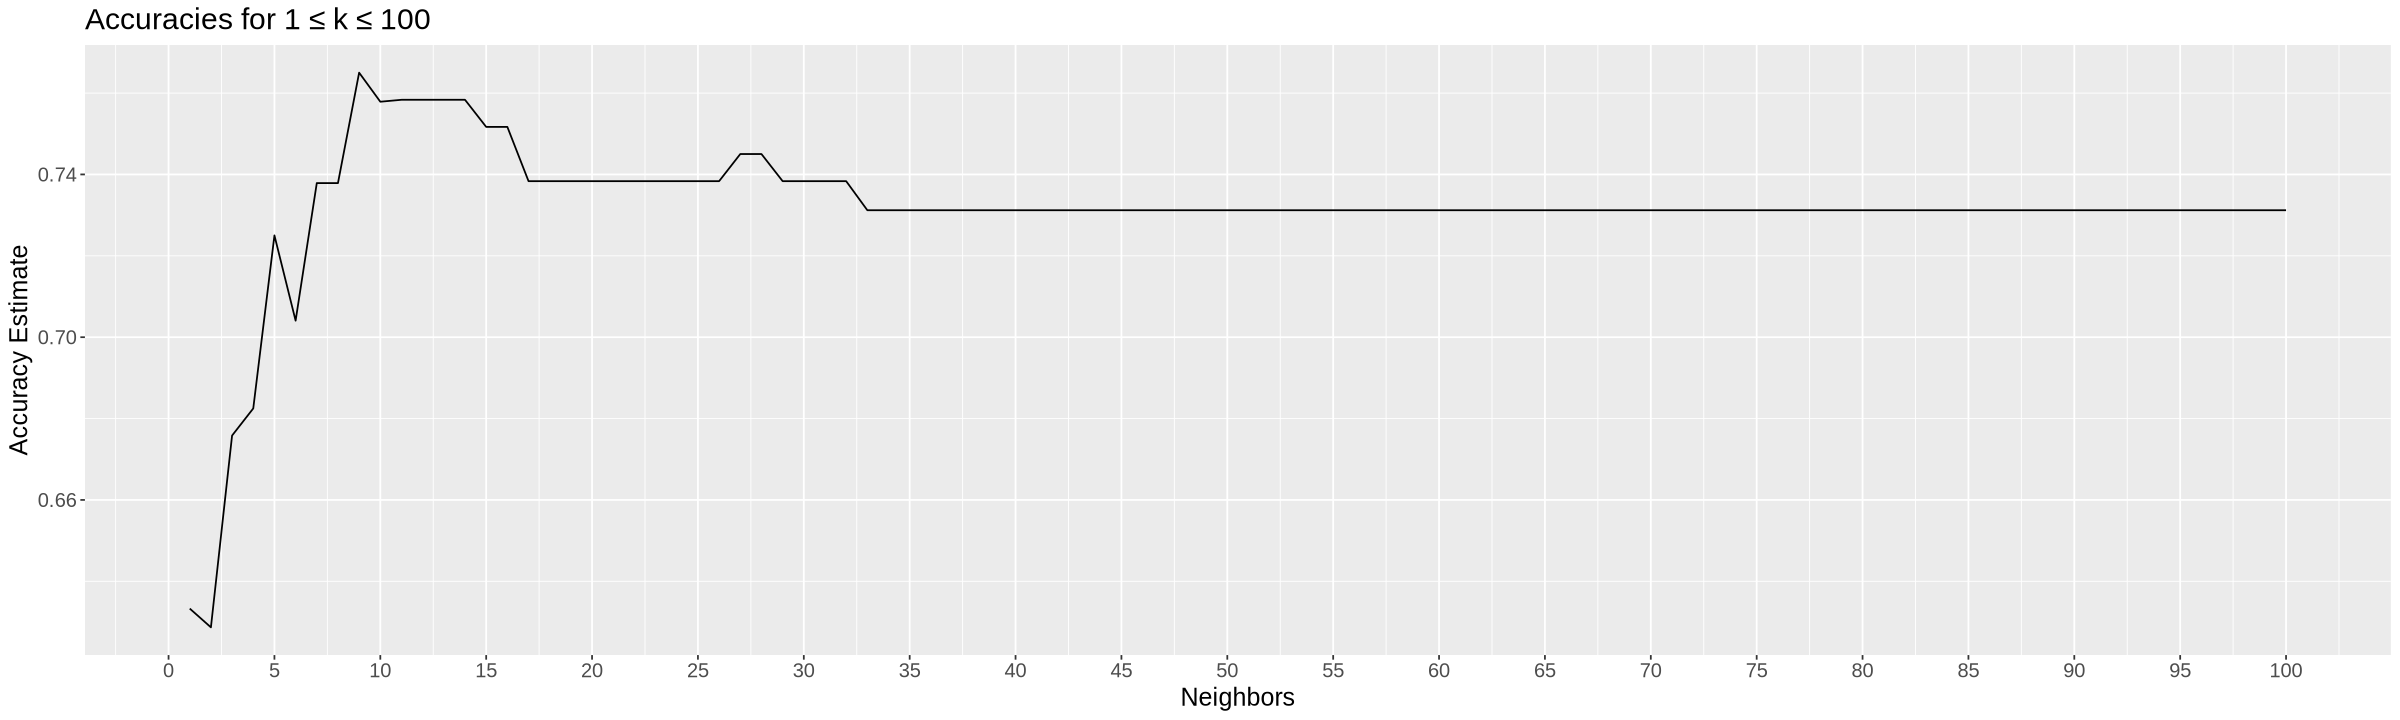

In [255]:
accuracy_versus_k <- ggplot(knn_results, aes(x = neighbors, y = mean))+
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracies for 1 ≤ k ≤ 100") +
      scale_x_continuous(breaks = seq(0, 100, by = 5)) + # adjusting the x-axis
      theme(text = element_text(size = 15))
cat("Figure 35")
accuracy_versus_k

<h4>Comparing to majority classifier</h4>
<p>We need to compare this accuracy to a majority classsifier, we will do this by comparing our previously calculated percentages of <code>subscribe</code>. If we remember Figure 17:</p>
<div>
     <h5 style = "margin-left:10px;">Figure 17</h5>
     <h5 style = "margin-left:20px;">subscribe</h5>
      <table style="margin: 0; margin-left: 10px;">
        <tr>
          <th>Category Name</th>
          <th>Count</th>
          <th>Percentage</th>
        </tr>
        <tr>
          <td>FALSE</td>
          <td>39</td>
          <td>26.9%</td>
        </tr>
        <tr>
          <td>TRUE</td>
          <td>106</td>
          <td>73.1%</td>
        </tr>
      </table>
    </div>
<p style = "max-width: 58rem;">We can see that a TRUE classification represents the majority of the training set with 73.1% of all results. Therefore, our classifier <em style = "font-weight:600;">k</em> = 9 is not more accurate as 76.5% > 73.1%.</p>

<h4>Building a model</h4>
<p>Now that we have value for <em style = "font-weight: 600">k</em>, we can create a spec using <code>neighbors = 9</code>. We then fit it to <code>players_training</code>.</p>

In [256]:
final_spec <- nearest_neighbor(weight_func="rectangular", neighbors = 9) |>
    set_engine("kknn") |>
    set_mode("classification")

fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(final_spec1) |>
    fit(data = players_training)

fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_mutate()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2344828
Best kernel: rectangular
Best k: 9

In [257]:
#predict
predictions <- predict(fit, players_testing) |>
               bind_cols(players_testing)

#find the accuracy of the predictions
metrics<- predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy") 

cat("Figure 36", "\n")
metrics

#confusion matrix, identifies the areas the model is weak at classifying
conf_mat<- predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
cat("Figure 37", "\n")
conf_mat

Figure 36 


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


Figure 37 


          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE     13   36

<ul>
    <li>TP (True Positive): Predicted subscribe = TRUE, actual = TRUE</li>
    <li>TN (True Negative): Predicted = FALSE, actual = FALSE</li>
    <li>FP (False Positive): Predicted = TRUE, actual = FALSE</li>
    <li>FN (False Negative): Predicted = FALSE, actual = TRUE</li>
</ul>
<p>Uh oh! We can see that our model only predicts <code>TRUE</code>, this may be becuase of class imbalance. We will try upsampling our data.</p>

In [258]:
set.seed(1)

players_recipe <- recipe(subscribe ~ experience + played_hours + num_sessions + age , data = players_training) |>
   step_mutate(experience = as.numeric(experience)) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors()) |>
   step_upsample(subscribe, over_ratio =1 )

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

players_vfold <- vfold_cv(players_training, v = 10, strata = subscribe)

gridvals <- tibble(neighbors = c(1:100))

# Create workflow
knn_results <- workflow() |>
      add_recipe(players_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = players_vfold, grid = gridvals) %>%
# Collect metrics, filter for accuracy
      collect_metrics() |>
      filter(.metric == "accuracy") |>
      select(neighbors, mean) |>
      arrange(desc(mean))

cat("Figure 38", "\n")
head(knn_results)

Figure 38 


neighbors,mean
<int>,<dbl>
41,0.6754945
42,0.6688278
95,0.6621612
96,0.6621612
93,0.6612088
94,0.6612088


<p>With upsampling <em style= "font-weight: 600;">k</em>=41 seems to give us the highest accuracy.</p>

Figure 39 


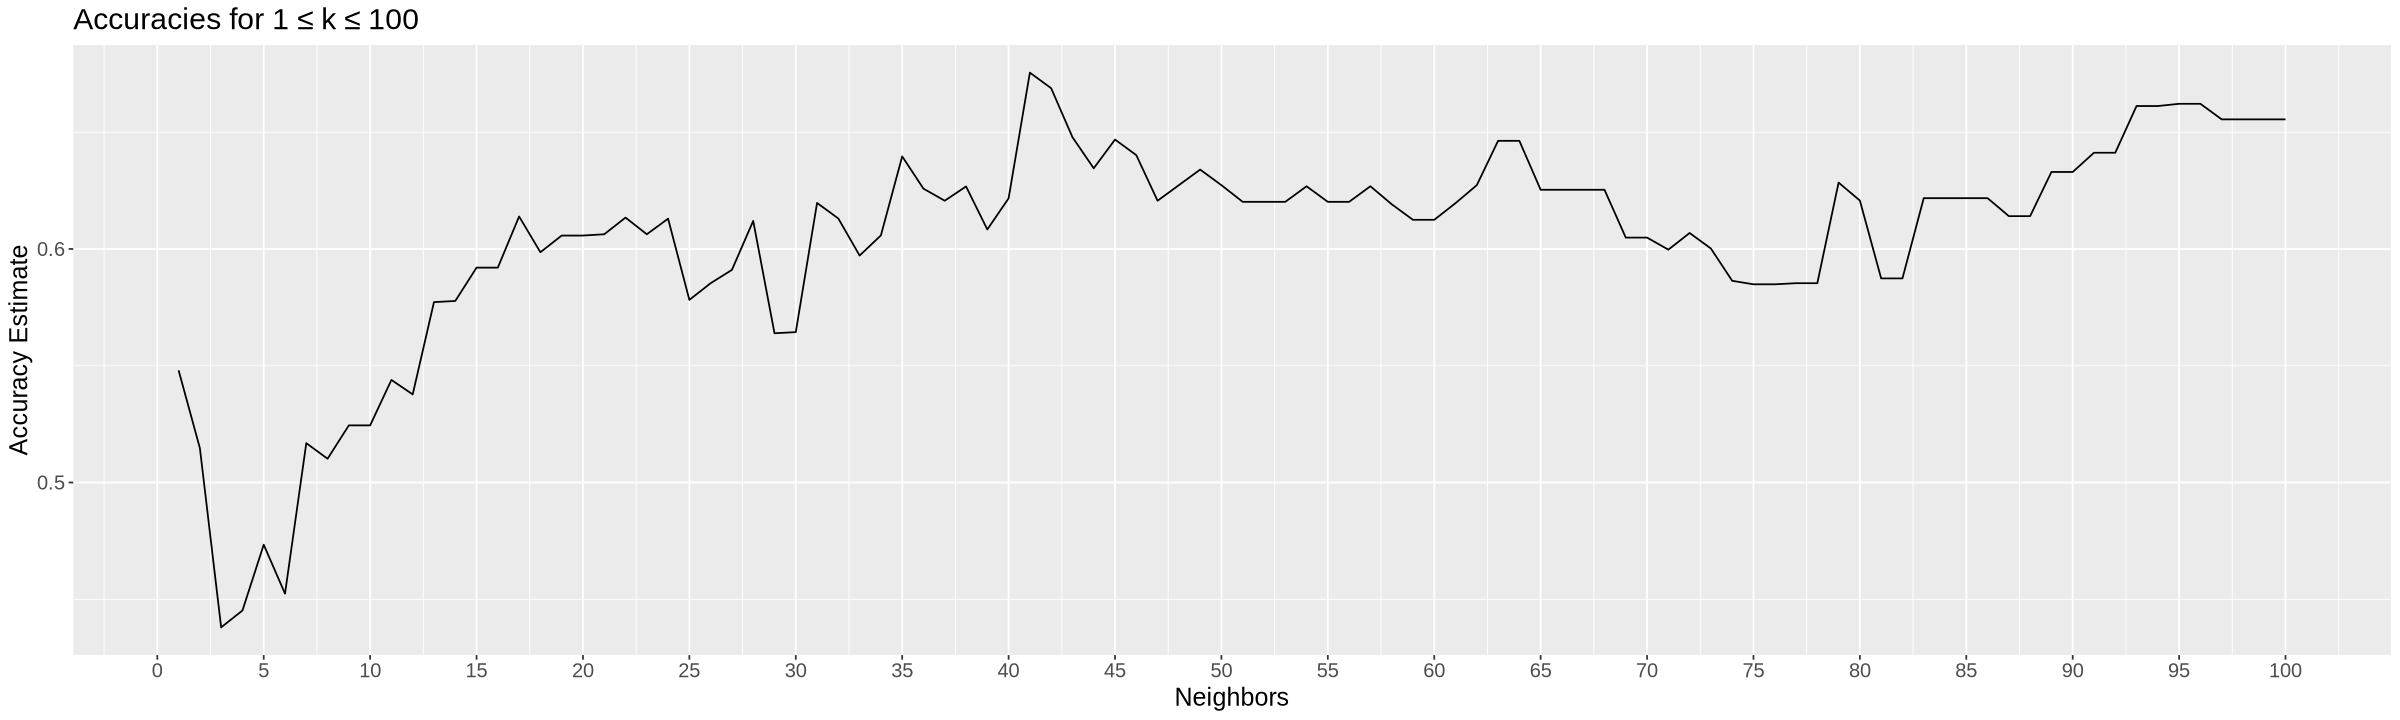

In [259]:
accuracy_versus_k <- ggplot(knn_results, aes(x = neighbors, y = mean))+
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracies for 1 ≤ k ≤ 100") +
      scale_x_continuous(breaks = seq(0, 100, by = 5)) + # adjusting the x-axis
      theme(text = element_text(size = 15))
cat("Figure 39", "\n")
accuracy_versus_k

<h4>Comparing to majority classifier</h4>
<p>We need to compare this accuracy to a majority classsifier, we will do this by comparing our previously calculated percentages of <code>subscribe</code>. If we remember Figure 17:</p>
<div>
     <h5 style = "margin-left:10px;">Figure 17</h5>
     <h5 style = "margin-left:20px;">subscribe</h5>
      <table style="margin: 0; margin-left: 10px;">
        <tr>
          <th>Category Name</th>
          <th>Count</th>
          <th>Percentage</th>
        </tr>
        <tr>
          <td>FALSE</td>
          <td>39</td>
          <td>26.9%</td>
        </tr>
        <tr>
          <td>TRUE</td>
          <td>106</td>
          <td>73.1%</td>
        </tr>
      </table>
    </div>
<p style = "max-width: 58rem;">We can see that a TRUE classification represents the majority of the training set with 73.1% of all results. Therefore, our classifier <em style = "font-weight:600;">k</em> = 41 is not more accurate 67.5% < 73.1%.</p>

<h4>Building the final model</h4>
<p>Now that we have value for <em style = "font-weight: 600">k</em>, we can create our final spec using <code>neighbors = 41</code>. We then fit it to <code>players_training</code>.</p>

In [262]:
set.seed(1)

final_spec <- nearest_neighbor(weight_func="rectangular", neighbors = 41) |>
    set_engine("kknn") |>
    set_mode("classification")

fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(final_spec) |>
    fit(data = players_training)

fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_mutate()
• step_scale()
• step_center()
• step_upsample()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(41,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3915094
Best kernel: rectangular
Best k: 41

We now have a working model one with <em>k</em> = 41.

<h3>Testing our classifier</h3>
<h4>Accuracy and confusion matrix</h4>
<p>Now, we will finally use the testing set to look at how our classifier performs when given data it has never seen before.</p>
<p>To do this, we will predict using the same <code>fit</code> as before, but this time with <code>players_testing</code>. We need to look at its accuracy using <code>metrics</code> and its confusion matrix using <code>conf_mat</code>.</p>

In [267]:
set.seed(1)

#predict
predictions <- predict(fit, players_testing) |>
               bind_cols(players_testing)

#find the accuracy of the predictions
metrics<- predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy") 

metrics

#confusion matrix, identifies the areas the model is weak at classifying
conf_mat<- predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
conf_mat

precision_result <- precision(predictions, truth = subscribe, estimate = .pred_class, event_level = "second")
precision_result

recall_result <- recall(predictions, truth = subscribe, estimate = .pred_class, event_level = "second")
recall_result


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6122449


          Truth
Prediction FALSE TRUE
     FALSE     3    9
     TRUE     10   27

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7297297


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.75


<p>We can see with <em style = "font-weight: 600;">k</em> = 41, <em style = "font-weight: 600;">k</em> for upsampled data, we achieve 61.2% accuracy, 72.9% precision and 75% recall.</p>
<ul>
    <li>TP (True Positive): Predicted subscribe = TRUE, actual = TRUE</li>
    <li>TN (True Negative): Predicted = FALSE, actual = FALSE</li>
    <li>FP (False Positive): Predicted = TRUE, actual = FALSE</li>
    <li>FN (False Negative): Predicted = FALSE, actual = TRUE</li>
</ul>

<h2 style = "color: #704e2e;">Discussion</h2>

#### Summary of results
In this project, we set out to determine whether a player’s experience, total played hours, number of sessions, and age could predict whether or not they subscribe to the newsletter. We did this using KNN Classification to build a predictive model on the players.csv dataset. After training and testing our model, we found that using k = 9 on the testing data, our model predicted true for all observations and ended up getting 36 out of 49 observations correct, yielding a 73.5% accuracy. 

However, we then decided to try the same methods on upsampled training data with a tuned k value of 41 as we found it odd that the first model predicted all true. Through this, we found that on the test set, the accuracy was lower at 61.2% with a precision of 72.9% and a recall of 75%.

#### Is this what we expected to find?
This is not what we expected to find prior to starting the analysis, as we initially thought that the k = 9 model would at least predict some false observations as its accuracy was higher than that of the majority classifier. However, after further discussion, we think that this could have been caused by several factors including biased training data and low sample size. The original `players.csv` data set included a high majority of players that were subscribed, meaning that for the majority of randomly selected training sets, they would also be imbalanced with a high proportion of subscribed players. Overall, this leads to the trained model being a lot more inclined to predict that players are subscribed no matter the testing data. Additionally, the fact that the sample size was small with the `players.csv` data set only had 196 observations meant that when we had to split it into training and testing sets, neither of them would have enough observations to generate reliable results on the effectiveness of our classifier.

We tried to resolve this issue by performing the same data analysis on upsampled training data with a tuned k value of 41, however we yielded an even lower accuracy of only 61.2%, though at least with this classifier, there was the difference that it did not predict only TRUE for whether a player had subscribed or not. We did expect the accuracy of this model to be a bit lower than the k = 9 model as its accuracy on the training set was lower than the majority classifier with a value of 67.5%.

#### Possible impacts of our findings
When considering the impacts that these findings could have, we would ideally like to be able to use this model to help businesses make smarter decisions on how to cater to their consumer base. Specifically, since we were looking at the characteristics of certain Minecraft players that could make them more likely to subscribe to a video-game newsletter, our model could provide information to newsletter businesses on what type of audiences they may want to cater their content towards. This is because our model would predict whether said audience types would actually subscribe to the newsletter or not. Contrastingly, the businesses could also use this model to find out who is not likely to subscribe to the newsletter, analyze why that may be, and then come up with a solution to try and get them to subscribe, overall expanding their consumer base.

Though these are good practical impacts, the efficiency of our model is not the best as our k = 9 model predicted true for all observations and our k = 41 model for upsampled data had a low accuracy. So it would not be reliable to use in a real world scenario. However, with some improvements, a model like this could definitely be used.

#### Future Questions
To expand on the topic explored in this report, there are a few questions that can be asked (some requiring additional data):
- What is the average age of a player subscribed to a video-game newsletter?
- What genre of video game newsletter is someone likely to be subscribed to based on specific characteristics?
- What factors other than age, experience, played hours, and number of sessions can be used to determine whether a player is subscribed to a video game newsletter?

Additionally, we can also ask the following questions with regards to design choices made during this project:
- Are there better predictors than the exact ones we chose to improve accuracy?
- Would a more complex model improve accuracy?
- How can we minimize the large amounts of false positives in our model?
- If we included predictors from the sessions.csv dataset instead of purely players.csv, would this yield more accurate results?

<h2 style = "color: #704e2e;">Bibliography</h2>

Where the data sets were obtained from:
The `sessions.csv` and `players.csv` data sets were obtained from the **The Pacific Laboratory for Artificial Intelligence (PLAI)** research group led by **Professor Frank Wood**.